In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
##

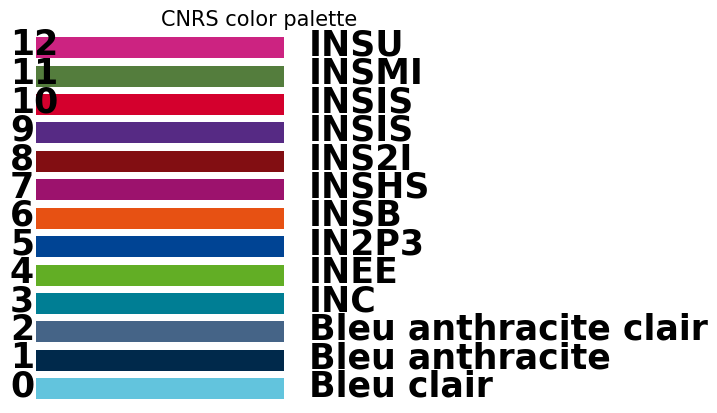

In [5]:

fig1, ax = plt.subplots()
##
x_list = np.zeros(5)
x_list[0] = 0.05
x_list[1] = 0.55
x_list[2] = 0.55
x_list[3] = 0.05
x_list[4] = 0.05
##
list_colors = ['#62c4dd', 
               '#00294b', 
               '#456487', 
               '#007e94', 
               '#62ae25', 
               '#004494', 
               '#e75113', 
               '#9c126d', 
               '#820e12', 
               '#562a84', 
               '#d4002d', 
               '#547d3d', 
               '#cc2381']
color_names = ['Bleu clair',
               'Bleu anthracite',
               'Bleu anthracite clair',
               'INC',
               'INEE',
               'IN2P3',
               'INSB',
               'INSHS',
               'INS2I',
               'INSIS',
               'INSIS',
               'INSMI',
               'INSU']
##
Ncolors = np.size(list_colors)
delta_y = 1.0/Ncolors
margin_y = 0.01
##
Ncolors = 13
for ind_color in range(Ncolors):
    ind_temp = Ncolors-1-ind_color
    y_temp = ind_color*delta_y
    y_list = np.zeros(5)
    y_list[0] = y_temp + margin_y
    y_list[1] = y_temp + margin_y
    y_list[2] = y_temp + delta_y - margin_y
    y_list[3] = y_temp + delta_y - margin_y
    y_list[4] = y_temp + margin_y
    plt.fill(x_list, y_list, facecolor=list_colors[ind_color]) # facecolor=color_rgb)
    plt.text(x_list[0]+0.55, y_list[0]+0.01, color_names[ind_color], fontsize=25, fontweight='bold')
    plt.text(x_list[0]-0.052, y_list[0]+0.01, ind_color, fontsize=25, fontweight='bold')
plt.axis([0, 1, 0, 1])
plt.rcParams['figure.figsize'] = [12, 8]
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
plt.title('CNRS color palette', fontsize=15)  
ax.axis('off')
plt.show() 

In [6]:
## colors, there are at most 5 colors
c_list = [list_colors[3], 
          list_colors[8], 
          list_colors[11], 
          list_colors[1], 
          list_colors[1], 
          list_colors[10],
          list_colors[9],
          list_colors[1], 
          list_colors[1], 
          list_colors[10],
          list_colors[9]
          ]
print(c_list[5])

#d4002d


['#007e94', '#820e12', '#547d3d', '#00294b', '#00294b', '#d4002d', '#562a84', '#00294b', '#00294b', '#d4002d', '#562a84']


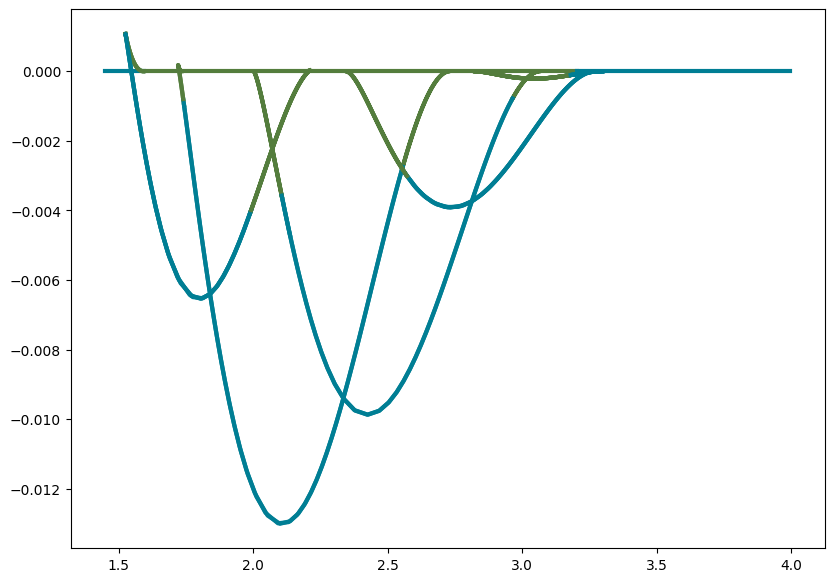

In [10]:
## Figure 2
# ---------------------------------------------------
## Plotting AUTO solutions with stability -  Model 1
# ---------------------------------------------------
# ---------------------------------------------------
# ---------------------------------------------------
# ---------------------------------------------------
print(c_list)
## Start the plot
plt.close()
fig = plt.figure()
figure_size_temp = 7
fig.set_figheight(figure_size_temp)
fig.set_figwidth(figure_size_temp*2.1)
#
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
#
gs = GridSpec(5,3, width_ratios=[6, 1, 1]) # 2 rows, 3 columns
#
ax0 = fig.add_subplot(gs[:,0]) # Energy 
# ax_1_a =fig.add_subplot(gs[0,1]) # alpha
# ax_1_e = fig.add_subplot(gs[0,2]) # epsilon
# ax_2_a = fig.add_subplot(gs[1,1]) # alpha
# ax_2_e = fig.add_subplot(gs[1,2]) # epsilon
# ax_3_a = fig.add_subplot(gs[2,1]) # alpha
# ax_3_e = fig.add_subplot(gs[2,2]) # epsilon
# ax_4_a = fig.add_subplot(gs[3,1]) # alpha
# ax_4_e = fig.add_subplot(gs[3,2]) # epsilon
# ax_5_a = fig.add_subplot(gs[4,1]) # alpha
# ax_5_e = fig.add_subplot(gs[4,2]) # epsilon
##
letters_fontsize = 26
## plot the AUTO solutions
list_auto = np.array([1, 2, 3, 4, 10, 8]) 
for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    ##
    data_load_temp = np.loadtxt('model_1_%d.txt' %ind_p)
    ##
    size_list = np.size(data_load_temp[:, 0])
    # print('size', size_list)
    #e_0_list = np.zeros(size_list)
    stability_current  = data_load_temp[0, 2]
    load_1 = np.array([data_load_temp[0, 0]])
    energy_1 = np.array([data_load_temp[0, 1]])
    for ind_e in range(size_list):
        load_t = data_load_temp[ind_e, 0]
        #e_0_list[ind_e] = load_t*load_t/(2.0 + load_t*load_t) + (rs/2.0)*load_t*load_t
        if -stability_current==data_load_temp[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data_load_temp[ind_e - 1, 0] + data_load_temp[ind_e, 0])/2
            e_mean = (data_load_temp[ind_e - 1, 1] + data_load_temp[ind_e, 1])/2
            # print('np.array([%.10f, %.10f])' %(load_mean, e_mean))
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                ax0.plot(load_1, energy_1, c=c_list[0], linewidth=3)
            elif stability_current==-1:
                ax0.plot(load_1, energy_1, c=c_list[1], linewidth=3)
            stability_current  = data_load_temp[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data_load_temp[ind_e, 0])
            energy_1 = np.append(energy_1, data_load_temp[ind_e, 1])

['#007e94', '#820e12', '#547d3d', '#00294b', '#00294b', '#d4002d', '#562a84', '#00294b', '#00294b', '#d4002d', '#562a84']


/Users/mterzi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:229: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


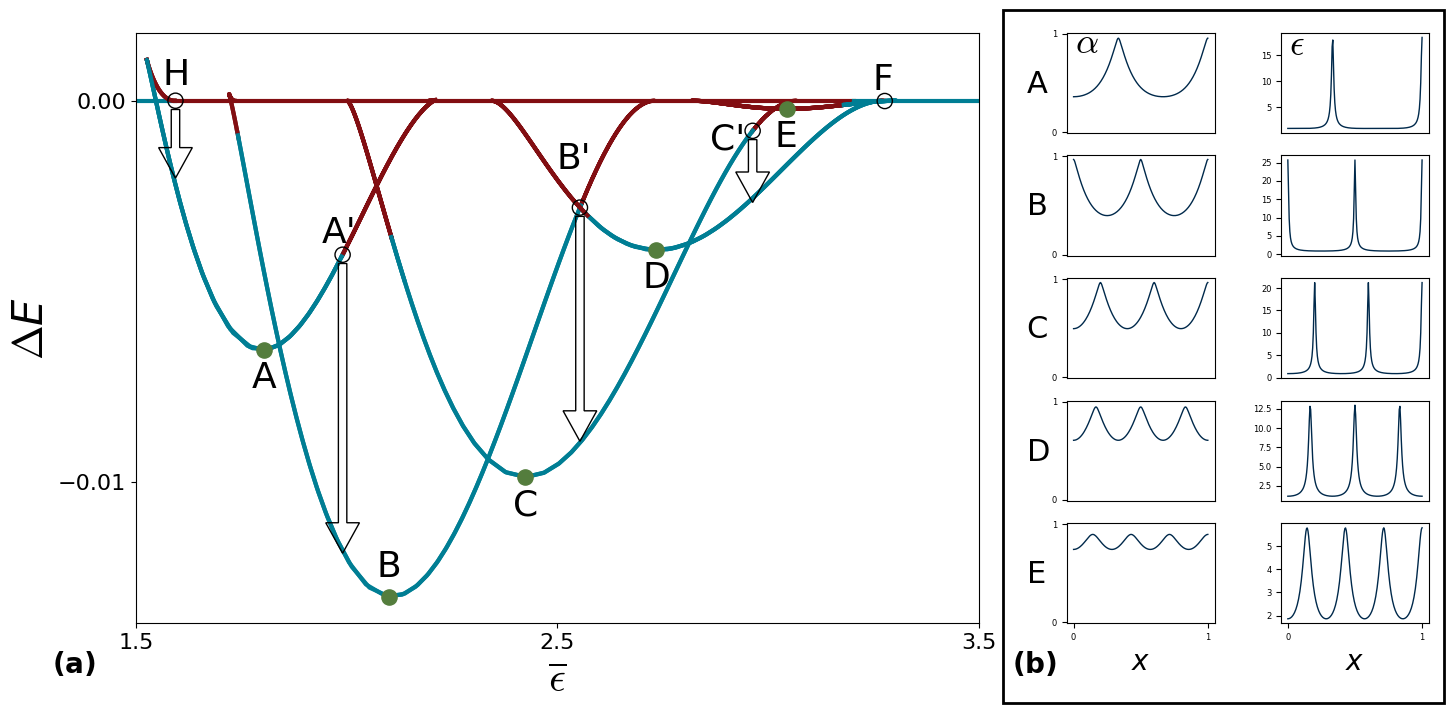

In [4]:
## Figure 2
# ---------------------------------------------------
## Plotting AUTO solutions with stability -  Model 1
# ---------------------------------------------------
# ---------------------------------------------------
# ---------------------------------------------------
# ---------------------------------------------------
print(c_list)
## Start the plot
plt.close()
fig = plt.figure()
figure_size_temp = 7
fig.set_figheight(figure_size_temp)
fig.set_figwidth(figure_size_temp*2.1)
#
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
#
gs = GridSpec(5,3, width_ratios=[6, 1, 1]) # 2 rows, 3 columns
#
ax0 = fig.add_subplot(gs[:,0]) # Energy 
ax_1_a =fig.add_subplot(gs[0,1]) # alpha
ax_1_e = fig.add_subplot(gs[0,2]) # epsilon
ax_2_a = fig.add_subplot(gs[1,1]) # alpha
ax_2_e = fig.add_subplot(gs[1,2]) # epsilon
ax_3_a = fig.add_subplot(gs[2,1]) # alpha
ax_3_e = fig.add_subplot(gs[2,2]) # epsilon
ax_4_a = fig.add_subplot(gs[3,1]) # alpha
ax_4_e = fig.add_subplot(gs[3,2]) # epsilon
ax_5_a = fig.add_subplot(gs[4,1]) # alpha
ax_5_e = fig.add_subplot(gs[4,2]) # epsilon
##
letters_fontsize = 26
## plot the AUTO solutions
list_auto = np.array([1, 2, 3, 4, 10, 8]) 
for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    ##
    data_load_temp = np.loadtxt('model_1_%d.txt' %ind_p)
    ##
    size_list = np.size(data_load_temp[:, 0])
    # print('size', size_list)
    #e_0_list = np.zeros(size_list)
    stability_current  = data_load_temp[0, 2]
    load_1 = np.array([data_load_temp[0, 0]])
    energy_1 = np.array([data_load_temp[0, 1]])
    for ind_e in range(size_list):
        load_t = data_load_temp[ind_e, 0]
        #e_0_list[ind_e] = load_t*load_t/(2.0 + load_t*load_t) + (rs/2.0)*load_t*load_t
        if -stability_current==data_load_temp[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data_load_temp[ind_e - 1, 0] + data_load_temp[ind_e, 0])/2
            e_mean = (data_load_temp[ind_e - 1, 1] + data_load_temp[ind_e, 1])/2
            # print('np.array([%.10f, %.10f])' %(load_mean, e_mean))
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                ax0.plot(load_1, energy_1, c=c_list[0], linewidth=3)
            elif stability_current==-1:
                ax0.plot(load_1, energy_1, c=c_list[1], linewidth=3)
            stability_current  = data_load_temp[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data_load_temp[ind_e, 0])
            energy_1 = np.append(energy_1, data_load_temp[ind_e, 1])
    # print(data_load_temp[-1, 0], data_load_temp[-1, 1])
## plot points for minimum energies
labels_list = ['A', 'B', 'C', 'D', 'E']
data_mins = np.loadtxt('model_1_mins.txt')
delta_y = np.array([-0.001, +0.0005, -0.001, -0.001, -0.001])
for ind_m in range(np.size(data_mins, 0)):
    ax0.scatter(data_mins[ind_m, 0], data_mins[ind_m, 1], c=c_list[2], s=120, zorder=3)
    ax0.text(data_mins[ind_m, 0]-0.03, data_mins[ind_m, 1]+delta_y[ind_m], labels_list[ind_m], fontsize=letters_fontsize) 
##
#-------------------------------------------
def plot_arrow(point_xy, la_temp):
    ax0.scatter(point_xy[0], point_xy[1], s=120, facecolors='none', edgecolors='k', zorder=3)
    dx = 0.0
    dy = -la_temp
    w_a = 0.02
    h_w = 0.08
    h_l = 0.0008
    if la_temp>0:
        ax0.arrow(point_xy[0], point_xy[1]-0.00023, dx, dy, facecolor='none', 
                head_width = h_w, head_length = h_l, width = w_a, 
                edgecolor='k', lw=circle_edge_size, zorder=3)
        # plt.arrow(point_xy[0], point_xy[1]-0.0001, 0.0, -0.0003, facecolor='w', 
        #         head_width = 0, head_length = 0, width = w_a-0.01, 
        #         edgecolor='none', lw=circle_edge_size, zorder=3)
#-------------------------------------------
## plotting circles
circle_edge_size = 1
## H
H_point = np.array([1.5937969925, 0.0000000000])
length_arrow = 0.001
plot_arrow(H_point, length_arrow)
ax0.text(H_point[0]-0.03, H_point[1]+0.0004, 'H', fontsize=letters_fontsize)
## A_prime
A_prime_point = np.array([1.9904599557, -0.0040393529])
length_arrow = 0.0068
plot_arrow(A_prime_point, length_arrow)
ax0.text(A_prime_point[0]-0.05, A_prime_point[1]+0.0003, 'A\'', fontsize=letters_fontsize)
## B_prime
B_prime_point = np.array([2.5537152245, -0.0028032125])
length_arrow = 0.0051
plot_arrow(B_prime_point, length_arrow)
ax0.text(B_prime_point[0]-0.055, B_prime_point[1]+0.001, 'B\'', fontsize=letters_fontsize)
## C_prime
C_prime_point = np.array([2.9635757174, -0.0007895701])
length_arrow = 0.00085
plot_arrow(C_prime_point, length_arrow)
ax0.text(C_prime_point[0]-0.1, C_prime_point[1]-0.0005, 'C\'', fontsize=letters_fontsize)
## F
F_point = np.array([3.2771690558, -7.9311e-06])
length_arrow = -1
plot_arrow(F_point, length_arrow)
ax0.text(F_point[0]-0.03, F_point[1]+0.0003, 'F', fontsize=letters_fontsize)
##
## plotting arrows
##
load_min = 1.5
load_max = 3.5
# plt.plot([1.59, 1.59], [-0.013, 0.001], 'r')
ax0.set_xlim([load_min - 0.001, load_max + 0.001])
ax0.set_box_aspect(7/10)
##
ax0.set(xlabel = r'$\overline{\epsilon}$')
ax0.xaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax0.set_xticks([1.5, 2.5, 3.5])
ax0.tick_params(axis='x', labelsize=16)
#
ax0.set(ylabel = r'$\Delta E$')
ax0.yaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax0.set_yticks([0.0, -0.01])
ax0.tick_params(axis='y', labelsize=16)
##
# ---------------------------------------------------
# ---------------------------------------------------
## Figure 2 (b)
# ---------------------------------------------------
# ---------------------------------------------
# ---------------------------------------------
## Ploting Damage(alpha) and Strain(epsilon)
def Plot_alpha(ind_p, ax_temp, tick_numer_size):
    plt_alpha = np.loadtxt('model_1_min_energy_x_vs_alpha_%d.txt' %ind_p)
    ax_temp.plot(plt_alpha[:, 0], plt_alpha[:, 1], c=c_list[3], lw=1)
    ax_temp.set_ylim([-0.01, 1.01])
    #
    # ax_temp.tick_params(axis='x', labelsize=tick_numer_size)
    ax_temp.set_yticks([0, 1])
    ax_temp.set_xticks([])
    ax_temp.tick_params(axis='y', labelsize=tick_numer_size)
    
##  
def Plot_epsilon(ind_p, ax_temp, tick_numer_size):
    plt_eps = np.loadtxt('model_1_min_energy_x_vs_epsilon_%d.txt' %ind_p)
    ax_temp.plot(plt_eps[:, 0], plt_eps[:, 1], c=c_list[4], lw=1)
    #
    # ax_temp.tick_params(axis='x', labelsize=tick_numer_size)
    ax_temp.set_xticks([])
    ax_temp.tick_params(axis='y', labelsize=tick_numer_size)
## (b) alpha and epsilon
##
load_mins = np.array([1.8045062776748153, 2.099982129348749, 2.424125191416801, 2.7331812619377707, 3.0454541332726235])
list_auto = np.array([1, 2, 3, 4, 10, 8]) 
# for ind_mins in range(np.size(load_mins, 0)):
#     ind_p = list_auto[ind_mins + 1]
#     # Plot_alpha(ind_p, ax_1_a)
#     # Plot_epsilon(ind_p, ax_1_e)
##
tick_numer_size = 6
##
ind_p = 2
Plot_alpha(ind_p, ax_1_a, tick_numer_size)
ax_1_a.text(-0.35, 0.4, 'A', fontsize=22)
ax_1_a.text(0.01, 0.8, r'$\alpha$', fontsize=26)
Plot_epsilon(ind_p, ax_1_e, tick_numer_size)
##
ind_p = 3
Plot_alpha(ind_p, ax_2_a, tick_numer_size)
ax_2_a.text(-0.35, 0.4, 'B', fontsize=22)
Plot_epsilon(ind_p, ax_2_e, tick_numer_size)
ax_1_e.text(0.01, 15, r'$\epsilon$', fontsize=26)
##
ind_p = 4
Plot_alpha(ind_p, ax_3_a, tick_numer_size)
ax_3_a.text(-0.35, 0.4, 'C', fontsize=22)
Plot_epsilon(ind_p, ax_3_e, tick_numer_size)
##
ind_p = 10
Plot_alpha(ind_p, ax_4_a, tick_numer_size)
ax_4_a.text(-0.35, 0.4, 'D', fontsize=22)
Plot_epsilon(ind_p, ax_4_e, tick_numer_size)
##
ind_p = 8
Plot_alpha(ind_p, ax_5_a, tick_numer_size)
ax_5_a.text(-0.35, 0.4, 'E', fontsize=22)
ax_5_a.set(xlabel = r'$x$')
# ax_5_a.labelsize(20)
ax_5_a.xaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
ax_5_a.set_xticks([0, 1])
ax_5_a.tick_params(axis='x', labelsize=tick_numer_size)
Plot_epsilon(ind_p, ax_5_e, tick_numer_size)
ax_5_e.set(xlabel = r'$x$')
# ax_5_a.labelsize(20)
ax_5_e.xaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
ax_5_e.set_xticks([0, 1])
ax_5_e.tick_params(axis='x', labelsize=tick_numer_size)
##
## ----------------------------------------
fig.tight_layout()
##
## plotting a rectangle around figures (b)
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.7, 0.01), 0.3, 0.99, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])
##
## printing (a) and (b) for subplots
ax0.text(1.3, -0.015, r'$\rm\bf(a)$', fontsize=20)
ax0.text(3.58, -0.015, r'$\rm\bf(b)$', fontsize=20)
##
fig.savefig('Figure_2.pdf')
fig.show()

/Users/mterzi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:228: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


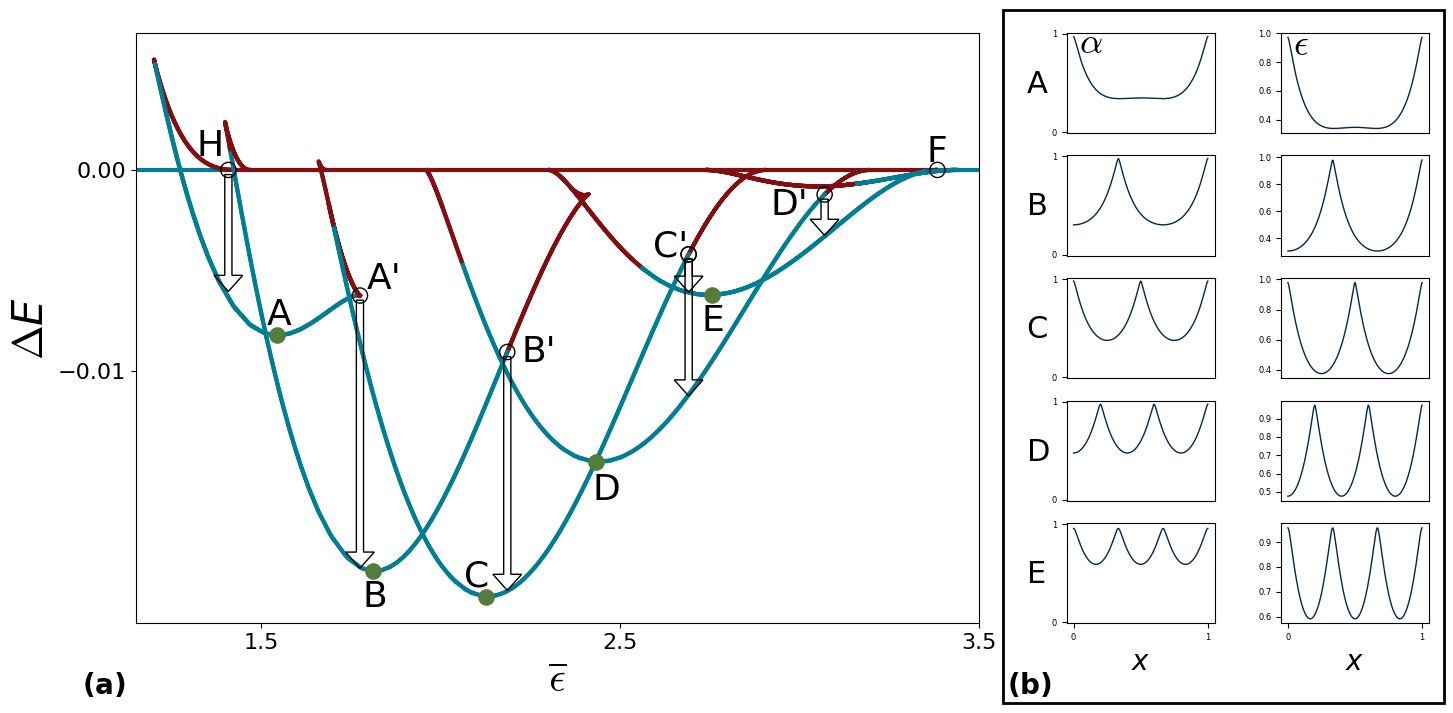

In [5]:
## Figure 3
# ---------------------------------------------------
## Plotting AUTO solutions with stability -  Model 1
# ---------------------------------------------------
# ---------------------------------------------------
# ---------------------------------------------------
# ---------------------------------------------------
## Start the plot
plt.close()
fig = plt.figure()
figure_size_temp = 7
fig.set_figheight(figure_size_temp)
fig.set_figwidth(figure_size_temp*2.1)
#
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
#
gs = GridSpec(5,3, width_ratios=[6, 1, 1]) # 2 rows, 3 columns
#
ax0 = fig.add_subplot(gs[:,0]) # Energy 
ax_1_a =fig.add_subplot(gs[0,1]) # alpha
ax_1_e = fig.add_subplot(gs[0,2]) # epsilon
ax_2_a = fig.add_subplot(gs[1,1]) # alpha
ax_2_e = fig.add_subplot(gs[1,2]) # epsilon
ax_3_a = fig.add_subplot(gs[2,1]) # alpha
ax_3_e = fig.add_subplot(gs[2,2]) # epsilon
ax_4_a = fig.add_subplot(gs[3,1]) # alpha
ax_4_e = fig.add_subplot(gs[3,2]) # epsilon
ax_5_a = fig.add_subplot(gs[4,1]) # alpha
ax_5_e = fig.add_subplot(gs[4,2]) # epsilon
##
letters_fontsize = 26
## plot the AUTO solutions
list_auto = np.array([1, 2, 3, 4, 6, 7, 9]) 
for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    ##
    data_load_temp = np.loadtxt('model_2_%d.txt' %ind_p)
    ##
    size_list = np.size(data_load_temp[:, 0])
    # print('size', size_list)
    #e_0_list = np.zeros(size_list)
    stability_current  = data_load_temp[0, 2]
    load_1 = np.array([data_load_temp[0, 0]])
    energy_1 = np.array([data_load_temp[0, 1]])
    for ind_e in range(size_list):
        load_t = data_load_temp[ind_e, 0]
        #e_0_list[ind_e] = load_t*load_t/(2.0 + load_t*load_t) + (rs/2.0)*load_t*load_t
        if -stability_current==data_load_temp[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data_load_temp[ind_e - 1, 0] + data_load_temp[ind_e, 0])/2
            e_mean = (data_load_temp[ind_e - 1, 1] + data_load_temp[ind_e, 1])/2
            # print('np.array([%.10f, %.10f])' %(load_mean, e_mean))
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                ax0.plot(load_1, energy_1, c=c_list[0], linewidth=3)
            elif stability_current==-1:
                ax0.plot(load_1, energy_1, c=c_list[1], linewidth=3)
            stability_current  = data_load_temp[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data_load_temp[ind_e, 0])
            energy_1 = np.append(energy_1, data_load_temp[ind_e, 1])
    # print(data_load_temp[-1, 0], data_load_temp[-1, 1])
## plot points for minimum energies
labels_list = ['A', 'B', 'C', 'D', 'E']
data_mins = np.loadtxt('model_2_mins.txt')
delta_x = np.array([-0.03, -0.03, -0.06, -0.01, -0.03])
delta_y = np.array([+0.0005, -0.0018, +0.0005, -0.0019, -0.0018])
for ind_m in range(np.size(data_mins, 0)-1):
    ax0.scatter(data_mins[ind_m, 0], data_mins[ind_m, 1], c=c_list[2], s=120, zorder=3)
    ax0.text(data_mins[ind_m, 0]+delta_x[ind_m], data_mins[ind_m, 1]+delta_y[ind_m], labels_list[ind_m], fontsize=letters_fontsize) 
##
#-------------------------------------------
def plot_arrow(point_xy, la_temp):
    circle_edge_size = 1
    ax0.scatter(point_xy[0], point_xy[1], s=120, facecolors='none', edgecolors='k', zorder=3)
    dx = 0.0
    dy = -la_temp
    w_a = 0.02
    h_w = 0.08
    h_l = 0.0008
    if la_temp>0:
        ax0.arrow(point_xy[0], point_xy[1]-0.00023, dx, dy, facecolor='none', 
                head_width = h_w, head_length = h_l, width = w_a, 
                edgecolor='k', lw=circle_edge_size, zorder=3)
        # plt.arrow(point_xy[0], point_xy[1]-0.0001, 0.0, -0.0003, facecolor='w', 
        #         head_width = 0, head_length = 0, width = w_a-0.01, 
        #         edgecolor='none', lw=circle_edge_size, zorder=3)
#-------------------------------------------
## plotting circles
## H
H_point = np.array([1.42785571145-0.02, 0.0000000000])
length_arrow = 0.005
plot_arrow(H_point, length_arrow)
ax0.text(H_point[0]-0.09, H_point[1]+0.0007, 'H', fontsize=letters_fontsize)
## A_prime
A_prime_point = np.array([1.7747393522000001, -0.0062324497])
length_arrow = 0.0125
plot_arrow(A_prime_point, length_arrow)
ax0.text(A_prime_point[0]+0.02, A_prime_point[1]+0.0003, 'A\'', fontsize=letters_fontsize)
## B_prime
B_prime_point = np.array([2.1855120281, -0.0090345641])
length_arrow = 0.0108
plot_arrow(B_prime_point, length_arrow)
ax0.text(B_prime_point[0]+0.04, B_prime_point[1]-0.0005, 'B\'', fontsize=letters_fontsize)
## C_prime
C_prime_point = np.array([2.6912294867, -0.00418862405])
length_arrow = 0.00085
plot_arrow(C_prime_point, length_arrow)
length_arrow = 0.006
plot_arrow(C_prime_point, length_arrow)
ax0.text(C_prime_point[0]-0.1, C_prime_point[1]-0.0001, 'C\'', fontsize=letters_fontsize)
## F
D_prime_point = np.array([3.0703009444, -0.0012200307])
length_arrow = 0.001
plot_arrow(D_prime_point, length_arrow)
ax0.text(D_prime_point[0]-0.15, D_prime_point[1]-0.001, 'D\'', fontsize=letters_fontsize)
## F
F_point = np.array([3.3847598835, -4.785e-08])
length_arrow = -1
plot_arrow(F_point, length_arrow)
ax0.text(F_point[0]-0.03, F_point[1]+0.0004, 'F', fontsize=letters_fontsize)
##
## plotting arrows
##
load_min = 1.15
load_max = 3.5
# plt.plot([1.59, 1.59], [-0.013, 0.001], 'r')
ax0.set_xlim([load_min - 0.001, load_max + 0.001])
ax0.set_box_aspect(7/10)
##
ax0.set(xlabel = r'$\overline{\epsilon}$')
ax0.xaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax0.set_xticks([1.5, 2.5, 3.5])
ax0.tick_params(axis='x', labelsize=16)
#
ax0.set(ylabel = r'$\Delta E$')
ax0.yaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax0.set_yticks([0.0, -0.01])
ax0.tick_params(axis='y', labelsize=16)
##
# ---------------------------------------------------
# ---------------------------------------------------
## Figure 2 (b)
# ---------------------------------------------------
# ---------------------------------------------
# ---------------------------------------------
## Ploting Damage(alpha) and Strain(epsilon)
def Plot_alpha(ind_p, ax_temp, tick_numer_size):
    plt_alpha = np.loadtxt('model_2_min_energy_x_vs_alpha_%d.txt' %ind_p)
    ax_temp.plot(plt_alpha[:, 0], plt_alpha[:, 1], c=c_list[3], lw=1)
    ax_temp.set_ylim([-0.01, 1.01])
    #
    # ax_temp.tick_params(axis='x', labelsize=tick_numer_size)
    ax_temp.set_yticks([0, 1])
    ax_temp.set_xticks([])
    ax_temp.tick_params(axis='y', labelsize=tick_numer_size)
    
##  
def Plot_epsilon(ind_p, ax_temp, tick_numer_size):
    plt_eps = np.loadtxt('model_2_min_energy_x_vs_epsilon_%d.txt' %ind_p)
    ax_temp.plot(plt_eps[:, 0], plt_eps[:, 1], c=c_list[4], lw=1)
    #
    # ax_temp.tick_params(axis='x', labelsize=tick_numer_size)
    ax_temp.set_xticks([])
    ax_temp.tick_params(axis='y', labelsize=tick_numer_size)
## (b) alpha and epsilon
tick_numer_size = 6
##
ind_p = list_auto[1]
Plot_alpha(ind_p, ax_1_a, tick_numer_size)
ax_1_a.text(-0.35, 0.4, 'A', fontsize=22)
ax_1_a.text(0.04, 0.8, r'$\alpha$', fontsize=26)
Plot_epsilon(ind_p, ax_1_e, tick_numer_size)
ax_1_e.text(0.04, 0.85, r'$\epsilon$', fontsize=26)
##
ind_p = list_auto[2]
Plot_alpha(ind_p, ax_2_a, tick_numer_size)
ax_2_a.text(-0.35, 0.4, 'B', fontsize=22)
Plot_epsilon(ind_p, ax_2_e, tick_numer_size)
##
ind_p = list_auto[3]
Plot_alpha(ind_p, ax_3_a, tick_numer_size)
ax_3_a.text(-0.35, 0.4, 'C', fontsize=22)
Plot_epsilon(ind_p, ax_3_e, tick_numer_size)
##
ind_p = list_auto[4]
Plot_alpha(ind_p, ax_4_a, tick_numer_size)
ax_4_a.text(-0.35, 0.4, 'D', fontsize=22)
Plot_epsilon(ind_p, ax_4_e, tick_numer_size)
##
ind_p = list_auto[5]
Plot_alpha(ind_p, ax_5_a, tick_numer_size)
ax_5_a.text(-0.35, 0.4, 'E', fontsize=22)
ax_5_a.set(xlabel = r'$x$')
# ax_5_a.labelsize(20)
ax_5_a.xaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
ax_5_a.set_xticks([0, 1])
ax_5_a.tick_params(axis='x', labelsize=tick_numer_size)
Plot_epsilon(ind_p, ax_5_e, tick_numer_size)
ax_5_e.set(xlabel = r'$x$')
# ax_5_a.labelsize(20)
ax_5_e.xaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
ax_5_e.set_xticks([0, 1])
ax_5_e.tick_params(axis='x', labelsize=tick_numer_size)
##
## ----------------------------------------
fig.tight_layout()
##
## plotting a rectangle around figures (b)
rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0.7, 0.01), 0.3, 0.99, fill=False, color="k", lw=2, 
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])
##
## printing (a) and (b) for subplots
ax0.text(1.0, -0.026, r'$\rm\bf(a)$', fontsize=20)
ax0.text(3.58, -0.026, r'$\rm\bf(b)$', fontsize=20)
##
fig.savefig('Figure_3.pdf')
fig.show()

#00294b


/Users/mterzi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:158: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


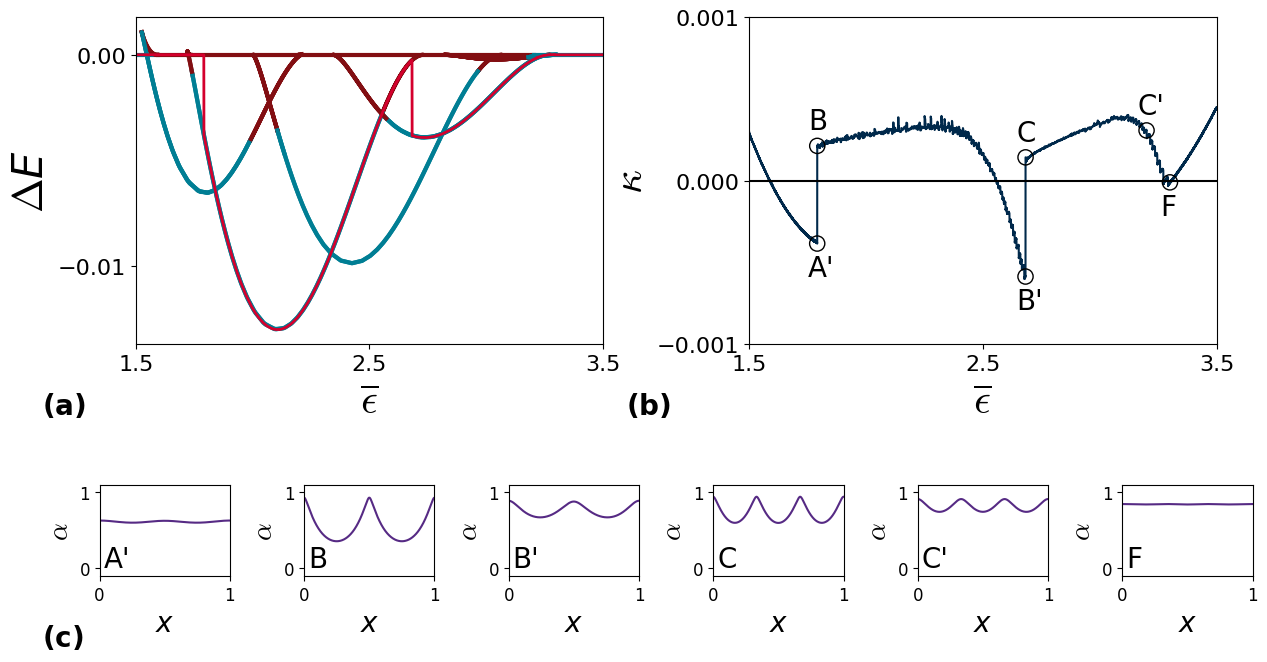

In [6]:
## Figure 4
# ---------------------------------------------------
# ---------------------------------------------
# ---------------------------------------------
## ploting load vs energy of a simulation 
## top of AUTO solutions
plt.close()
fig = plt.figure()
figure_size_temp = 7
fig.set_figheight(figure_size_temp)
fig.set_figwidth(figure_size_temp*1.8)
#
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
#
gs = GridSpec(2, 6, height_ratios=[1.1,1]) # 2 rows, 3 columns
#
ax0 = fig.add_subplot(gs[0,0:3]) # Energy 
ax1 =fig.add_subplot(gs[0,3:6]) # alpha
ax_A1 =fig.add_subplot(gs[1,0]) # alpha
ax_A2 =fig.add_subplot(gs[1,1]) # alpha
ax_A3 =fig.add_subplot(gs[1,2]) # alpha
ax_A4 =fig.add_subplot(gs[1,3]) # alpha
ax_A5 =fig.add_subplot(gs[1,4]) # alpha
ax_A6 =fig.add_subplot(gs[1,5]) # alpha
# ---------------------------------------------
## plot the AUTO solutions
list_auto = np.array([1, 2, 3, 4, 10, 8]) 
for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    ##
    data_load_temp = np.loadtxt('model_1_%d.txt' %ind_p)
    ##
    size_list = np.size(data_load_temp[:, 0])
    # print('size', size_list)
    #e_0_list = np.zeros(size_list)
    stability_current  = data_load_temp[0, 2]
    load_1 = np.array([data_load_temp[0, 0]])
    energy_1 = np.array([data_load_temp[0, 1]])
    for ind_e in range(size_list):
        load_t = data_load_temp[ind_e, 0]
        #e_0_list[ind_e] = load_t*load_t/(2.0 + load_t*load_t) + (rs/2.0)*load_t*load_t
        if -stability_current==data_load_temp[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data_load_temp[ind_e - 1, 0] + data_load_temp[ind_e, 0])/2
            e_mean = (data_load_temp[ind_e - 1, 1] + data_load_temp[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                ax0.plot(load_1, energy_1, c=c_list[0], linewidth=3)
            elif stability_current==-1:
                ax0.plot(load_1, energy_1, c=c_list[1], linewidth=3)
            stability_current  = data_load_temp[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data_load_temp[ind_e, 0])
            energy_1 = np.append(energy_1, data_load_temp[ind_e, 1])
##
data_load = np.loadtxt('list_672_load.txt')
num_points = np.size(data_load, 0)
energy_list = np.zeros(num_points)
for ind_pl in range(num_points):
    load = data_load[ind_pl, 0]
    e0 = load*load/(2.0 + load*load)
    energy_list[ind_pl] = data_load[ind_pl, 1] - e0
print(c_list[4])
ax0.plot(data_load[:, 0], energy_list, c=c_list[5], linewidth=2)
##
load_min = 1.5
load_max = 3.3
# plt.plot([1.59, 1.59], [-0.013, 0.001], 'r')
ax0.set_box_aspect(7/10)
ax0.set_xlim([load_min - 0.001, load_max + 0.001])
ax0.set(xlabel = r'$\overline{\epsilon}$')
ax0.xaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax0.set_xticks([1.5, 2.5, 3.5])
ax0.tick_params(axis='x', labelsize=16)
#
ax0.set(ylabel = r'$\Delta E$')
ax0.yaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax0.set_yticks([0.0, -0.01])
ax0.tick_params(axis='y', labelsize=16)
##
data_eig = np.loadtxt('load_vs_eigenvalue0_model_1.txt')
ax1.set_box_aspect(7/10)
ax1.plot(data_eig[:, 0], data_eig[:, 1], c=c_list[3])
ax1.plot([1, 4],[0, 0], 'k')
ax1.set_xlim([1.5, 3.5])
ax1.set_ylim([- 0.001, 0.001])
#
ax1.set(xlabel = r'$\overline{\epsilon}$')
ax1.xaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax1.set_xticks([1.5, 2.5, 3.5])
ax1.tick_params(axis='x', labelsize=16)
#
ax1.set(ylabel = r'$\kappa$')
ax1.yaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax1.set_yticks([-0.001, 0.0, 0.001])
ax1.tick_params(axis='y', labelsize=16)
#
index_list = [1456, 1457, 5911, 5912, 8500, 9000]
list_letter = ['A\'', 'B', 'B\'', 'C', 'C\'', 'F']
delta_x = [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04]
delta_y = [-0.0002, 0.0001, -0.0002, 0.0001, 0.0001, -0.0002]
for ind_j in range(6):
    ind = index_list[ind_j]
    ax1.scatter(data_eig[ind, 0], data_eig[ind, 1], s=120, facecolors='none', edgecolors='k', zorder=3)
    ax1.text(data_eig[ind, 0]+delta_x[ind_j], data_eig[ind, 1]+delta_y[ind_j], '%s' %list_letter[ind_j], fontsize=20)
## ------------------------------------
def axis_and_labels(ax_temp):
    ax_temp.set_box_aspect(7/10)
    ax_temp.set_xlim([0.0, 1.0])
    ax_temp.set_ylim([-0.1, 1.1])
    ax_temp.set(xlabel = r'$x$')
    ax_temp.xaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax_temp.set_xticks([0.0, 1.0])
    ax_temp.tick_params(axis='x', labelsize=12)
    ax_temp.set(ylabel = r'$\alpha$')
    ax_temp.yaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax_temp.set_yticks([0.0, 1.0])
    ax_temp.tick_params(axis='y', labelsize=12)
##
data_jumps = np.loadtxt('jumps_alpha_model_1.txt')
ax_A1.plot(data_jumps[:, 0], data_jumps[:, 1], c=c_list[6])
axis_and_labels(ax_A1)
ax_A1.text(0.03, 0.01, 'A\'', fontsize=20)
##
ax_A2.plot(data_jumps[:, 0], data_jumps[:, 2], c=c_list[6])
axis_and_labels(ax_A2)
ax_A2.text(0.03, 0.01, 'B', fontsize=20)
##
ax_A3.plot(data_jumps[:, 0], data_jumps[:, 3], c=c_list[6])
axis_and_labels(ax_A3)
ax_A3.text(0.03, 0.01, 'B\'', fontsize=20)
##
ax_A4.plot(data_jumps[:, 0], data_jumps[:, 4], c=c_list[6])
axis_and_labels(ax_A4)
ax_A4.text(0.03, 0.01, 'C', fontsize=20)
##
ax_A5.plot(data_jumps[:, 0], data_jumps[:, 5], c=c_list[6])
axis_and_labels(ax_A5)
ax_A5.text(0.03, 0.01, 'C\'', fontsize=20)
##
ax_A6.plot(data_jumps[:, 0], data_jumps[:, 6], c=c_list[6])
axis_and_labels(ax_A6)
ax_A6.text(0.03, 0.01, 'F', fontsize=20)
#
fig.tight_layout(h_pad=2.0)
##
## printing (a) and (b) and (c) for subplots
ax0.text(1.1, -0.017, r'$\rm\bf(a)$', fontsize=20)
ax0.text(3.6, -0.017, r'$\rm\bf(b)$', fontsize=20)
ax0.text(1.1, -0.028, r'$\rm\bf(c)$', fontsize=20)
fig.savefig('Figure_4.pdf')
fig.show()


/Users/mterzi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:158: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


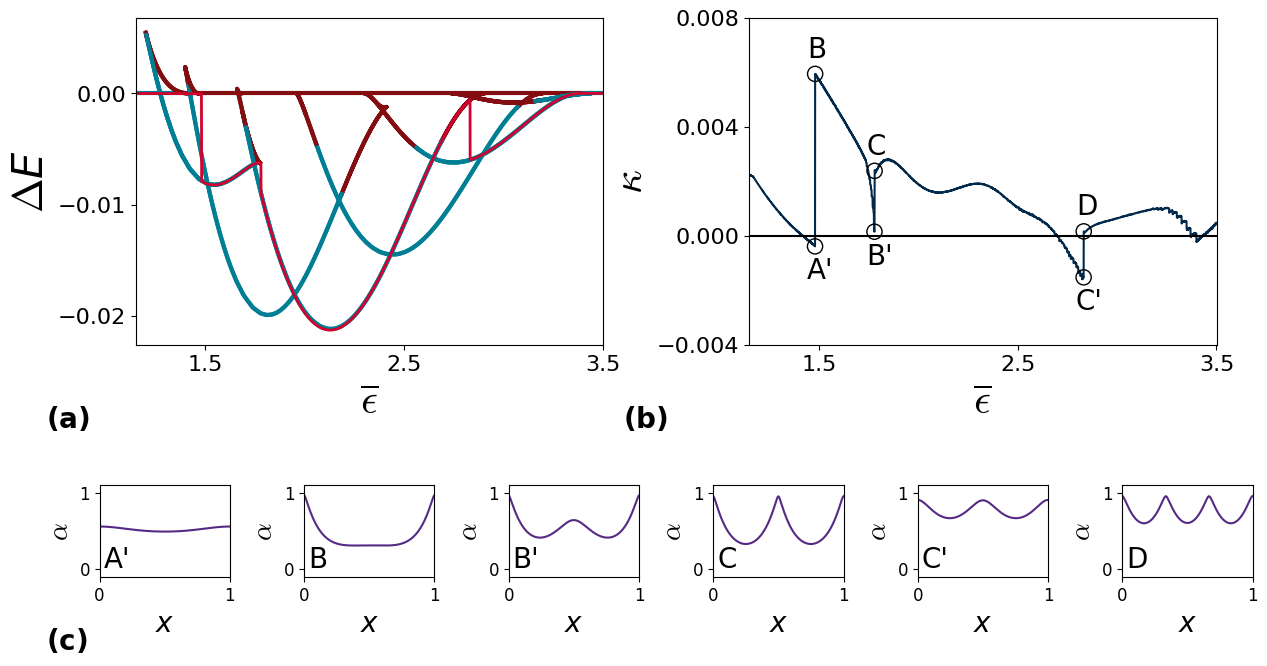

In [7]:
## Figure 4
# ---------------------------------------------------
# ---------------------------------------------
# ---------------------------------------------
## ploting load vs energy of a simulation 
## top of AUTO solutions
plt.close()
fig = plt.figure()
figure_size_temp = 7
fig.set_figheight(figure_size_temp)
fig.set_figwidth(figure_size_temp*1.8)
#
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
#
gs = GridSpec(2, 6, height_ratios=[1.1,1]) # 2 rows, 3 columns
#
ax0 = fig.add_subplot(gs[0,0:3]) # Energy 
ax1 =fig.add_subplot(gs[0,3:6]) # alpha
ax_A1 =fig.add_subplot(gs[1,0]) # alpha
ax_A2 =fig.add_subplot(gs[1,1]) # alpha
ax_A3 =fig.add_subplot(gs[1,2]) # alpha
ax_A4 =fig.add_subplot(gs[1,3]) # alpha
ax_A5 =fig.add_subplot(gs[1,4]) # alpha
ax_A6 =fig.add_subplot(gs[1,5]) # alpha
# ---------------------------------------------
## plot the AUTO solutions
list_auto = np.array([1, 2, 3, 4, 6, 7, 9]) 
for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    ##
    data_load_temp = np.loadtxt('model_2_%d.txt' %ind_p)
    ##
    size_list = np.size(data_load_temp[:, 0])
    # print('size', size_list)
    #e_0_list = np.zeros(size_list)
    stability_current  = data_load_temp[0, 2]
    load_1 = np.array([data_load_temp[0, 0]])
    energy_1 = np.array([data_load_temp[0, 1]])
    for ind_e in range(size_list):
        load_t = data_load_temp[ind_e, 0]
        #e_0_list[ind_e] = load_t*load_t/(2.0 + load_t*load_t) + (rs/2.0)*load_t*load_t
        if -stability_current==data_load_temp[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data_load_temp[ind_e - 1, 0] + data_load_temp[ind_e, 0])/2
            e_mean = (data_load_temp[ind_e - 1, 1] + data_load_temp[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                ax0.plot(load_1, energy_1, c=c_list[0], linewidth=3)
            elif stability_current==-1:
                ax0.plot(load_1, energy_1, c=c_list[1], linewidth=3)
            stability_current  = data_load_temp[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data_load_temp[ind_e, 0])
            energy_1 = np.append(energy_1, data_load_temp[ind_e, 1])
##
data_load = np.loadtxt('list_678_load.txt')
num_points = np.size(data_load, 0)
energy_list = np.zeros(num_points)
rs = 0.5
for ind_pl in range(num_points):
    load = data_load[ind_pl, 0]
    e0 = load*load/(2.0 + load*load) + (rs/2.0)*load*load
    energy_list[ind_pl] = data_load[ind_pl, 1] - e0
ax0.plot(data_load[:, 0], energy_list, c=c_list[5], linewidth=2)
##
load_min = 1.15
load_max = 3.5
# plt.plot([1.59, 1.59], [-0.013, 0.001], 'r')
ax0.set_xlim([load_min - 0.001, load_max + 0.001])
ax0.set_box_aspect(7/10)
ax0.set(xlabel = r'$\overline{\epsilon}$')
ax0.xaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax0.set_xticks([1.5, 2.5, 3.5])
ax0.tick_params(axis='x', labelsize=16)
#
ax0.set(ylabel = r'$\Delta E$')
ax0.yaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax0.set_yticks([0.0, -0.01, -0.02])
ax0.tick_params(axis='y', labelsize=16)
##
data_eig = np.loadtxt('load_vs_eigenvalue0_model_2.txt')
ax1.set_box_aspect(7/10)
ax1.plot(data_eig[:, 0], data_eig[:, 1], c=c_list[3])
ax1.plot([1, 4],[0, 0], 'k')
ax1.set_xlim([load_min - 0.001, load_max + 0.001])
ax1.set_ylim([- 0.004, 0.008])
#
ax1.set(xlabel = r'$\overline{\epsilon}$')
ax1.xaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax1.set_xticks([1.5, 2.5, 3.5])
ax1.tick_params(axis='x', labelsize=16)
#
ax1.set(ylabel = r'$\kappa$')
ax1.yaxis.get_label().set(fontsize=30) #, position=[0.5,0.7])
ax1.set_yticks([-0.004, 0.0, 0.004, 0.008])
ax1.tick_params(axis='y', labelsize=16)
#
index_list = [924, 925, 1499, 1500, 3522, 3523]
list_letter = ['A\'', 'B', 'B\'', 'C', 'C\'', 'D']
delta_x = [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04]
delta_y = [-0.0012, 0.0006, -0.0012, 0.0006, -0.0012, 0.0006]
for ind_j in range(6):
    ind = index_list[ind_j]
    ax1.scatter(data_eig[ind, 0], data_eig[ind, 1], s=120, facecolors='none', edgecolors='k', zorder=3)
    ax1.text(data_eig[ind, 0]+delta_x[ind_j], data_eig[ind, 1]+delta_y[ind_j], '%s' %list_letter[ind_j], fontsize=20)
## ------------------------------------
def axis_and_labels(ax_temp):
    ax_temp.set_box_aspect(7/10)
    ax_temp.set_xlim([0.0, 1.0])
    ax_temp.set_ylim([-0.1, 1.1])
    ax_temp.set(xlabel = r'$x$')
    ax_temp.xaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax_temp.set_xticks([0.0, 1.0])
    ax_temp.tick_params(axis='x', labelsize=12)
    ax_temp.set(ylabel = r'$\alpha$')
    ax_temp.yaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax_temp.set_yticks([0.0, 1.0])
    ax_temp.tick_params(axis='y', labelsize=12)
##
data_jumps = np.loadtxt('jumps_alpha_model_2.txt')
ax_A1.plot(data_jumps[:, 0], data_jumps[:, 1], c=c_list[6])
axis_and_labels(ax_A1)
ax_A1.text(0.03, 0.01, 'A\'', fontsize=20)
##
ax_A2.plot(data_jumps[:, 0], data_jumps[:, 2], c=c_list[6])
axis_and_labels(ax_A2)
ax_A2.text(0.03, 0.01, 'B', fontsize=20)
##
ax_A3.plot(data_jumps[:, 0], data_jumps[:, 3], c=c_list[6])
axis_and_labels(ax_A3)
ax_A3.text(0.03, 0.01, 'B\'', fontsize=20)
##
ax_A4.plot(data_jumps[:, 0], data_jumps[:, 4], c=c_list[6])
axis_and_labels(ax_A4)
ax_A4.text(0.03, 0.01, 'C', fontsize=20)
##
ax_A5.plot(data_jumps[:, 0], data_jumps[:, 5], c=c_list[6])
axis_and_labels(ax_A5)
ax_A5.text(0.03, 0.01, 'C\'', fontsize=20)
##
ax_A6.plot(data_jumps[:, 0], data_jumps[:, 6], c=c_list[6])
axis_and_labels(ax_A6)
ax_A6.text(0.03, 0.01, 'D', fontsize=20)
#
fig.tight_layout(h_pad=2.0)
##
## printing (a) and (b) and (c) for subplots
ax0.text(0.7, -0.03, r'$\rm\bf(a)$', fontsize=20)
ax0.text(3.6, -0.03, r'$\rm\bf(b)$', fontsize=20)
ax0.text(0.7, -0.05, r'$\rm\bf(c)$', fontsize=20)
fig.savefig('Figure_5.pdf')
fig.show()

/Users/mterzi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


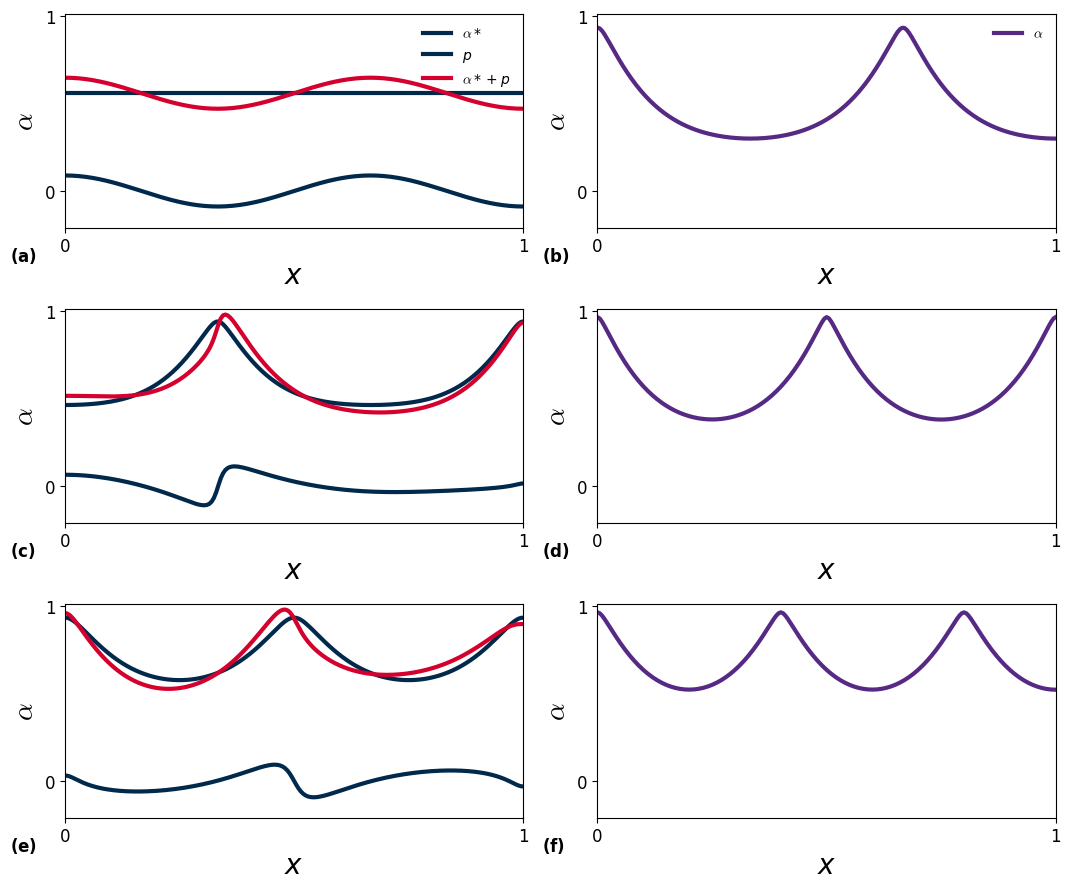

In [23]:
## Figure 6 
# ---------------------------------------------------
# ---------------------------------------------
# ---------------------------------------------
plt.close()
fig = plt.figure()
figure_size_temp = 9
fig.set_figheight(figure_size_temp)
fig.set_figwidth(figure_size_temp*1.2)
#
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
#
gs = GridSpec(3, 2) # 2 rows, 3 columns
#
ax1_1 = fig.add_subplot(gs[0,0]) # 
ax1_2 = fig.add_subplot(gs[0,1]) # 
ax2_1 = fig.add_subplot(gs[1,0]) # 
ax2_2 = fig.add_subplot(gs[1,1]) # 
ax3_1 = fig.add_subplot(gs[2,0]) # 
ax3_2 = fig.add_subplot(gs[2,1]) # 
##
def plot_kicks(ax1_temp, ax2_temp, ind_p):
    data_kick = np.loadtxt('kick_alpha_model_1_%d.txt' %ind_p)
    if ind_p==1:
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 1], linewidth=3, c=c_list[7], label=r'$\alpha*$')
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 2], linewidth=3, c=c_list[8], label=r'$p$')
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 3], linewidth=3, c=c_list[9], label=r'$\alpha*+p$')
        ax1_temp.legend(loc="upper right", framealpha=0.0)
    else:
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 1], linewidth=3, c=c_list[7])
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 2], linewidth=3, c=c_list[8])
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 3], linewidth=3, c=c_list[9])
    ax1_temp.set_xlim([0.0, 1.0])
    ax1_temp.set_ylim([-0.21, 1.01])
    ax1_temp.set(xlabel = r'$x$')
    ax1_temp.xaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax1_temp.set_xticks([0.0, 1.0])
    ax1_temp.tick_params(axis='x', labelsize=12)
    ax1_temp.set(ylabel = r'$\alpha$')
    ax1_temp.yaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax1_temp.set_yticks([0.0, 1.0])
    ax1_temp.tick_params(axis='y', labelsize=12)
    #
    if ind_p==1:
        ax2_temp.plot(data_kick[:, 0], data_kick[:, 4], linewidth=3, c=c_list[10], label=r'$\alpha$')
        ax2_temp.legend(loc="upper right", framealpha=0.0)
    else:
        ax2_temp.plot(data_kick[:, 0], data_kick[:, 4], linewidth=3, c=c_list[10])
    ax2_temp.set_xlim([0.0, 1.0])
    ax2_temp.set_ylim([-0.21, 1.01])
    ax2_temp.set(xlabel = r'$x$')
    ax2_temp.xaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax2_temp.set_xticks([0.0, 1.0])
    ax2_temp.tick_params(axis='x', labelsize=12)
    ax2_temp.set(ylabel = r'$\alpha$')
    ax2_temp.yaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax2_temp.set_yticks([0.0, 1.0])
    ax2_temp.tick_params(axis='y', labelsize=12)
list_auto = np.array([1, 2, 3])
##
ind_p = list_auto[0]
plot_kicks(ax1_1, ax1_2, ind_p)
ax1_1.text(-0.12, -0.4, r'$\rm\bf(a)$', weight='bold', fontsize=12)
ax1_2.text(-0.12, -0.4, r'$\rm\bf(b)$', weight='bold', fontsize=12)
#
ind_p = list_auto[1]
plot_kicks(ax2_1, ax2_2, ind_p)
ax2_1.text(-0.12, -0.4, r'$\rm\bf(c)$', weight='bold', fontsize=12)
ax2_2.text(-0.12, -0.4, r'$\rm\bf(d)$', weight='bold', fontsize=12)

ind_p = list_auto[2]
plot_kicks(ax3_1, ax3_2, ind_p)
ax3_1.text(-0.12, -0.4, r'$\rm\bf(e)$', weight='bold', fontsize=12)
ax3_2.text(-0.12, -0.4, r'$\rm\bf(f)$', weight='bold', fontsize=12)
# 
fig.tight_layout()
#
fig.savefig('Figure_6.pdf')
fig.show()

/Users/mterzi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


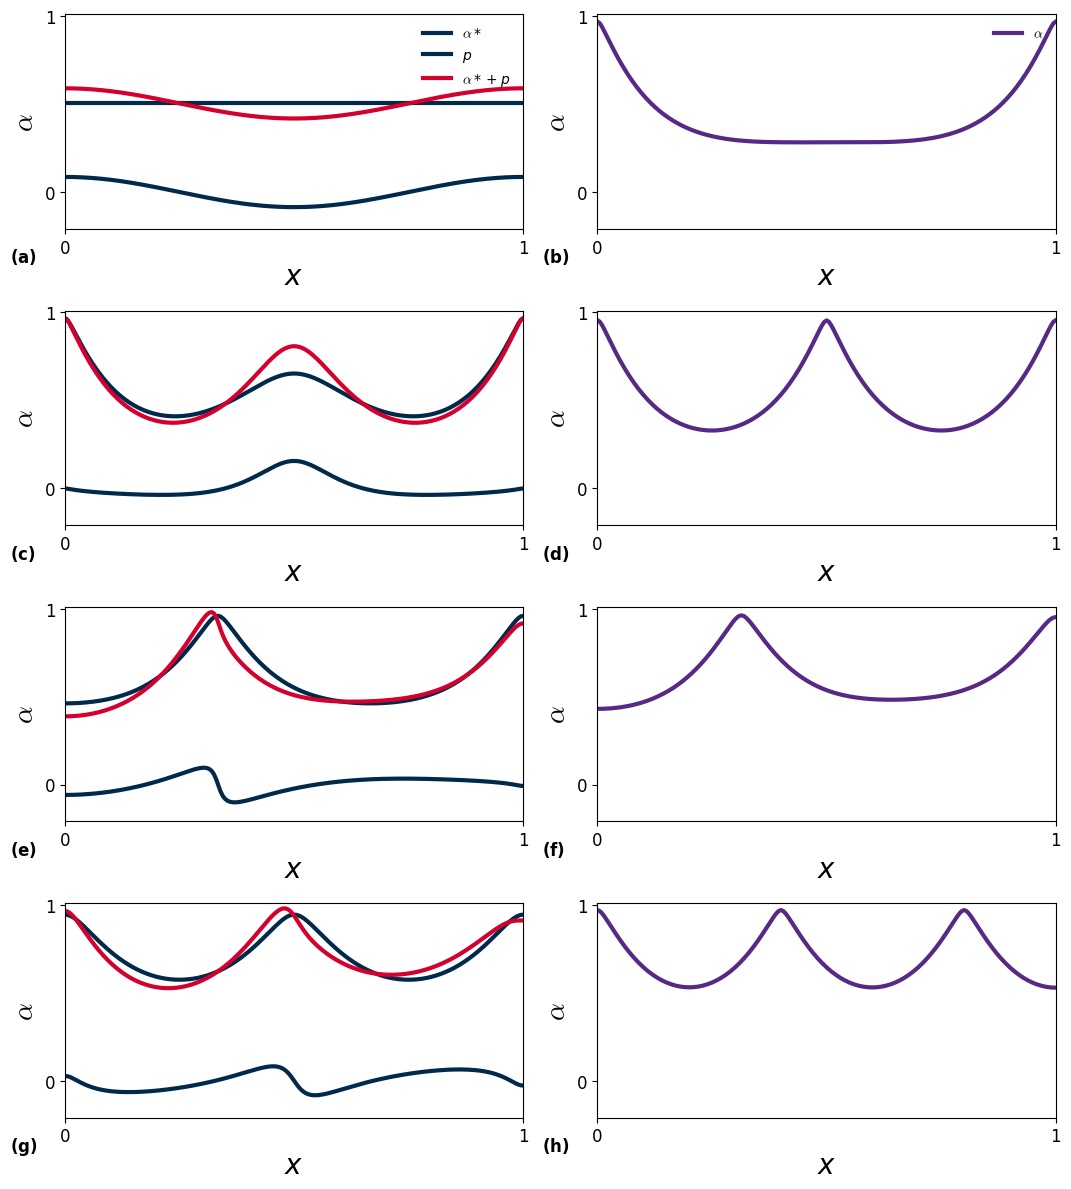

In [24]:
## Figure 6 
# ---------------------------------------------------
# ---------------------------------------------
# ---------------------------------------------
plt.close()
fig = plt.figure()
figure_size_temp = 9
fig.set_figheight(figure_size_temp*(4/3))
fig.set_figwidth(figure_size_temp*1.2)
#
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
#
gs = GridSpec(4, 2) # 2 rows, 3 columns
#
ax1_1 = fig.add_subplot(gs[0,0]) # 
ax1_2 = fig.add_subplot(gs[0,1]) # 
ax2_1 = fig.add_subplot(gs[1,0]) # 
ax2_2 = fig.add_subplot(gs[1,1]) # 
ax3_1 = fig.add_subplot(gs[2,0]) # 
ax3_2 = fig.add_subplot(gs[2,1]) # 
ax4_1 = fig.add_subplot(gs[3,0]) # 
ax4_2 = fig.add_subplot(gs[3,1]) # 
##
def plot_kicks(ax1_temp, ax2_temp, ind_p):
    data_kick = np.loadtxt('kick_alpha_model_2_%d.txt' %ind_p)
    if ind_p==1:
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 1], linewidth=3, c=c_list[7], label=r'$\alpha*$')
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 2], linewidth=3, c=c_list[8], label=r'$p$')
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 3], linewidth=3, c=c_list[9], label=r'$\alpha*+p$')
        ax1_temp.legend(loc="upper right", framealpha=0.0)
    else:
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 1], linewidth=3, c=c_list[7])
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 2], linewidth=3, c=c_list[8])
        ax1_temp.plot(data_kick[:, 0], data_kick[:, 3], linewidth=3, c=c_list[9])
    ax1_temp.set_xlim([0.0, 1.0])
    ax1_temp.set_ylim([-0.21, 1.01])
    ax1_temp.set(xlabel = r'$x$')
    ax1_temp.xaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax1_temp.set_xticks([0.0, 1.0])
    ax1_temp.tick_params(axis='x', labelsize=12)
    ax1_temp.set(ylabel = r'$\alpha$')
    ax1_temp.yaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax1_temp.set_yticks([0.0, 1.0])
    ax1_temp.tick_params(axis='y', labelsize=12)
    #
    #
    if ind_p==1:
        ax2_temp.plot(data_kick[:, 0], data_kick[:, 4], linewidth=3, c=c_list[10], label=r'$\alpha$')
        ax2_temp.legend(loc="upper right", framealpha=0.0)
    else:
        ax2_temp.plot(data_kick[:, 0], data_kick[:, 4], linewidth=3, c=c_list[10])
    ax2_temp.set_xlim([0.0, 1.0])
    ax2_temp.set_ylim([-0.21, 1.01])
    ax2_temp.set(xlabel = r'$x$')
    ax2_temp.xaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax2_temp.set_xticks([0.0, 1.0])
    ax2_temp.tick_params(axis='x', labelsize=12)
    ax2_temp.set(ylabel = r'$\alpha$')
    ax2_temp.yaxis.get_label().set(fontsize=20) #, position=[0.5,0.7])
    ax2_temp.set_yticks([0.0, 1.0])
    ax2_temp.tick_params(axis='y', labelsize=12)
list_auto = np.array([1, 2, 3, 4, 6, 7, 9]) 
##
ind_p = list_auto[0]
plot_kicks(ax1_1, ax1_2, ind_p)
ax1_1.text(-0.12, -0.4, r'$\rm\bf(a)$', weight='bold', fontsize=12)
ax1_2.text(-0.12, -0.4, r'$\rm\bf(b)$', weight='bold', fontsize=12)
#
ind_p = list_auto[1]
plot_kicks(ax2_1, ax2_2, ind_p)
ax2_1.text(-0.12, -0.4, r'$\rm\bf(c)$', weight='bold', fontsize=12)
ax2_2.text(-0.12, -0.4, r'$\rm\bf(d)$', weight='bold', fontsize=12)
#
ind_p = list_auto[2]
plot_kicks(ax3_1, ax3_2, ind_p)
ax3_1.text(-0.12, -0.4, r'$\rm\bf(e)$', weight='bold', fontsize=12)
ax3_2.text(-0.12, -0.4, r'$\rm\bf(f)$', weight='bold', fontsize=12)
# 
ind_p = list_auto[3]
plot_kicks(ax4_1, ax4_2, ind_p)
ax4_1.text(-0.12, -0.4, r'$\rm\bf(g)$', weight='bold', fontsize=12)
ax4_2.text(-0.12, -0.4, r'$\rm\bf(h)$', weight='bold', fontsize=12)
# 
fig.tight_layout()
#
fig.savefig('Figure_7.pdf')
fig.show()